Text Mining - Práctica

AFI - Máster en Data Science y Big Data

Juan de Dios Romero Palop

Abril 2022


### EJERCICIO 1 Fechas

Vamos a crear expresiones regulares que nos permitan detectar dentro de un texto fechas en distintos formatos. 

In [1]:
import re

In [2]:
# 1.1 Construye una regex que se active con el siguiente formato dd-mm-yy (e.g. 30-03-20)
def is_date(date: str):
    if re.search('^(0?[1-9]|[12][0-9]|3[01])-(0[1-9]|1[012])-(\d{2})$', date):
        return date, True
    return date, False

print(is_date('30-03-20'))
print(is_date('3-03-20'))
print(is_date('40-03-20'))
print(is_date('20-3-20'))
print(is_date('10-13-20'))
print(is_date('10-13-2020'))

('30-03-20', True)
('3-03-20', True)
('40-03-20', False)
('20-3-20', False)
('10-13-20', False)
('10-13-2020', False)


In [3]:
# 1.2 A veces en vez de - se utiliza /. Modifica la regex anterior para que también se active con el siguiente formato:
# dd/mm/yy (e.g. 30/03/20)
# Ojo, debe activarse también con el formato de la celda anterior.

def is_date(date: str):
    if re.search('^(0?[1-9]|[12][0-9]|3[01])[-/](0[1-9]|1[012])[-/](\d{2})$', date):
        return date, True
    return date, False
    
print(is_date('30/03/20'))
print(is_date('10/03/20'))

('30/03/20', True)
('10/03/20', True)


In [4]:
# 1.3 Has llegado hasta aquí pero tú también sabes que no siempre se añade el 0 a los meses que van de enero a septiembre.
# Modifica tu regex para que tenga en cuenta esto. (e.g. 30/3/20)
# Ojo, debe activarse también con el formato de las celdas anteriores.

def is_date(date: str):
    if re.search('^(0?[1-9]|[12][0-9]|3[01])[-/](0?[1-9]|1[012])[-/](\d{2})$', date):
        return date, True
    return date, False
    
print(is_date('30/3/20'))
print(is_date('10/012/20'))


('30/3/20', True)
('10/012/20', False)


### EJERCICIO 2 Emails 

In [5]:
# Construye una regex que compruebe que un token cumple los requisitos para ser una dirección de email.
def is_mail(mail: str):
    '''
    Ejemplos y reglas tomadas de https://en.wikipedia.org/wiki/Email_address#Syntax
    Local-part
    - uppercase and lowercase Latin letters A to Z and a to z
    - digits 0 to 9
    - dot ., provided that it is not the first or last character and provided also that it does not appear consecutively
    - printable characters !#$%&'*+-/=?^_`{|}~ (tampoco dejaremos que sean el primer o el último carácter)

    Domain
    - uppercase and lowercase Latin letters A to Z and a to z;
    - digits 0 to 9, provided that top-level domain names are not all-numeric;
    - hyphen -, provided that it is not the first or last character.
    '''
    if re.search('^([A-Za-z0-9]+[\.\!\#\$\%\&\'\*\+\-\/\=\?\^\_\`\{\|\}\~]?[A-Za-z0-9]+)+@([A-Za-z0-9]+\-?[A-Za-z0-9]+)+(\.[A-Z|a-z]{2,})+$', mail):
        return mail, True
    return mail, False

# Ejemplos válidos
print('Ejemplos válidos')
print(is_mail('simple@example.com'))
print(is_mail('very.common@example.com'))
print(is_mail('disposable.style.email.with+symbol@example.com'))
print(is_mail('other.email-with-hyphen@example.com'))
print(is_mail('fully-qualified-domain@example.com'))
print(is_mail('user.name+tag+sorting@example.com'))
print(is_mail('example-indeed@strange-example.com'))

# Ejemplos no válidos
print('\nEjemplos no válidos')
print(is_mail('Abc.example.com')) # (no @ character)
print(is_mail('Abc..example.com')) # (2 dotsconsecutively)
print(is_mail('A@b@c@example.com')) # (only one @ is allowed outside quotation marks)
print(is_mail('a"b(c)d,e:f;g<h>i[j\k]l@example.com')) # (none of the special characters in this local-part are allowed outside quotation marks)
print(is_mail('this is not\allowed@example.com')) # (spaces, quotes, and backslashes may only exist when within quoted strings and preceded by a backslash)
print(is_mail('i_like_underscore@but_its_not_allowed_in_this_part.example.com')) # (Underscore is not allowed in domain part)

Ejemplos válidos
('simple@example.com', True)
('very.common@example.com', True)
('disposable.style.email.with+symbol@example.com', True)
('other.email-with-hyphen@example.com', True)
('fully-qualified-domain@example.com', True)
('user.name+tag+sorting@example.com', True)
('example-indeed@strange-example.com', True)

Ejemplos no válidos
('Abc.example.com', False)
('Abc..example.com', False)
('A@b@c@example.com', False)
('a"b(c)d,e:f;g<h>i[j\\k]l@example.com', False)
('this is not\x07llowed@example.com', False)
('i_like_underscore@but_its_not_allowed_in_this_part.example.com', False)


### EJERCICIO 3 Analizador de estilo

Prepara una secuencia de celdas que te sirva para hacer un análisis exploratorio del estilo de un texto cualquiera. Utiliza las funciones vistas en clase e incluye una celda con el texto explicando para que te serviría cada una de ellas. Elige un texto (puedes utilizar alguno de los ya incluídos en los paquetes o incluir alguno que encuentres por tu cuenta), aplica las celdas sobre él y analiza los resultados obtenidos.

PD. Si decides utilizar un texto nuevo acuerdate de incluirlo en la respuesta de la práctica.

PD2. Puedes elegir si lo haces sobre un texto en español o en ingles. 

PD3. Recuerda lo dicho en clase, más vale pocas cosas pero relevantes que aplicar todo lo visto en clase sin motivo.

#### Guión de la pelíicula gladiator

Importamos la librería nltk y leemos el fichero con el guión de la película.

In [6]:
import nltk
nltk.download('punkt')

file = open('gladiator_transcript.txt')
t = file.read().lower()
file.close()
tokens = nltk.word_tokenize(t)
gladiator = nltk.Text(tokens)
gladiator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Text: gladiator - the movie * * * *...>

Una vez tenemos cargado el texto, podemos primero hacer gráfico con una nube de palabras que muestre las que más se repitan en el guión de nuestra película.

In [7]:
from wordcloud import STOPWORDS, WordCloud
title_wordcloud = WordCloud(stopwords=STOPWORDS, height=2000, width=4000).generate(
    t
)

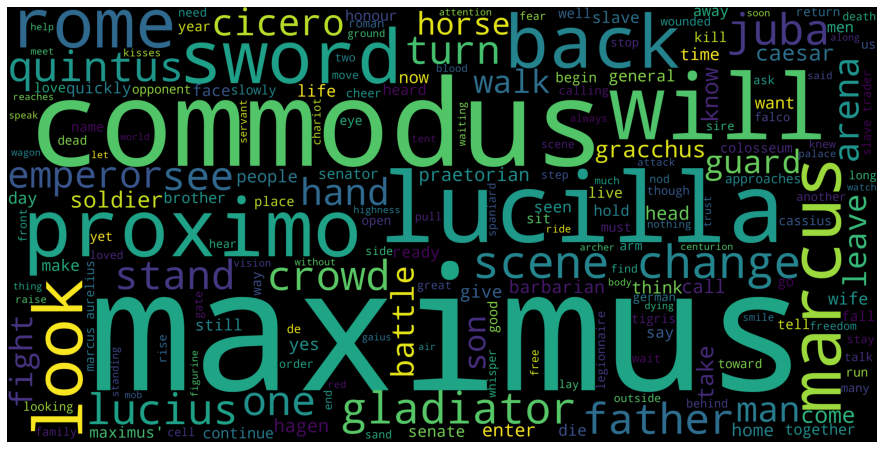

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()

Podemos ver cuáles son los principales protagonistas como son Maximus, Commodus, Proximo o Lucilla. También, con ello nos podemos hacer una idea de lo que puede ir la trama infiriendo de palabras como gladiator, Rome, soldier, battle o emperor. Gracias a ello intuimos que se va a tratar de una película de gladiadores y batallas en la antigua Roma.

Según el título de la película podemos pensar que hay un personaje que le llaman gladiador. Podemos ver, mediante la función concordance, el contexto en el que se utiliza esta palabra.

In [9]:
gladiator.concordance("gladiator")

Displaying 18 of 18 matches:
 gladiator - the movie * * * * * * * * * * * 
r god himself . maximus you were a gladiator ? proximo yes , i was [ responding
me . as their wagon pulls into the gladiator school , the guard opens the wagon
ng down towards the boy . ] lucius gladiator , are you the one they call spania
 eyes to pierce through . the head gladiator calls out instructions before they
 to die , salute you '' . only one gladiator refuses to make such a salute -- m
 drop their weapons . ] praetorian gladiator , the emperor has asked for you . 
 . i do n't think there has been a gladiator to match you , as for this young m
ve a name ... ? maximus my name is gladiator . [ maximus slowly turns around an
 maximus . ] [ scene change to the gladiator school . gladiators sit at a table
 taken by two guards , back to the gladiator school . they pass through the str
gladiators are training inside the gladiator school . maximus walks through the
hank you m'lady . [ scene change - gladiator 

Se observa que, por lo general,  se utiliza la palabra con un sentido más genérico, aunque alguna vez que se llama a un personaje de esta manera.

También podemos ver el posible significado que se le dan a ciertas palabras según su contexto con la función similar.

Por ejemplo, otra vez para gladiator:

In [11]:
gladiator.similar("gladiator")

man general republic slave and emperor child vision soldiers you rome
dead tree time look senate city smile spaniard gladiators


Tenemos que gladiator se relaciona con palabras como slave, general, man, spaniard; todo ello características que se ajustan a Commudus.

In [28]:
gladiator.similar("emperor")

crowd vision battle soldiers line mob name senate gate chariot sand
ring legionnaires gladiator height deserts borders rule winter way


También podemos buscar que conjuntos de palabras tienen significado juntamos ambas:

In [29]:
gladiator.collocations()

scene change; marcus aurelius; slave trader; arena floor; old friend;
gladiator school; leather pouch; still alive; roma victa; n't know;
senator gracchus; trap door; frightened slave; battle field; maximus
looks; last time; maximus stands; crowd cheers; little bee; maximus
nods


Podemos destacar, por ejemplo, scene change que tiene todo el sentido sabiendo que estamos analizando un guion de película. 

Con más sentido dentro de lo que buscamos nos encontramos a: gladiator school, battle field o Senator Gracchus (un personaje).

A continuación, analizaremos con un gráfico de dispersión las veces que aparece el nombre de cada protagonista en el guión.

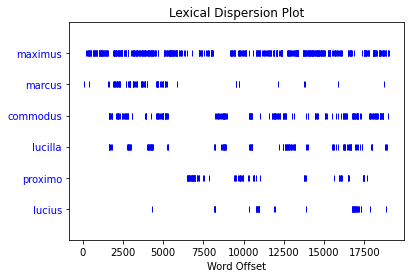

In [12]:
gladiator.dispersion_plot(["maximus", "marcus", "commodus", "lucilla", "proximo", "lucius"])

Vemos que claramente Maximus es el protagonista absoluto de la película. Tras él irían Commudus y Lucilla como coprotagonistas. Podemos intuir también que Marcus es un personaje que puede que muera hacia el primer cuarto de la película, a excepción de escasas veces que puede que lo nombre. Proximo y Lucius sólo aparecen una vez avanzada la película.

### EJERCICIO 4 Traductor años 90

In [14]:
# Utiliza las funcionalidades de wordnet vistas en clase para crear un traductor palabra a palabra.
# El resultado debe ser la traducción al inglés de la siguiente historia

# Para ello, utilizaremos las funciones que nos permiten traducir del español al inglés

from nltk.corpus import wordnet

text = '''indio querer hablar vaquero
vaquero disparar
vaquero hombre malo'''

for line in text.split('\n'):
    print(' '.join([wordnet.synsets(word, lang='spa')[0].lemma_names('eng')[0] for word in line.split()]))



Indian will talk cowboy
cowboy shoot
cowboy homo bad


In [15]:
# Ahora me gustaría saber como quedaría esta historia en japonés. 
# En las traspas tienes información importante sobre cómo hacerlo.
# Pista: quizás debas dar un rodeo.

# Para traducir del español al japonés, primero tendremos que utilizar el inglés como lengua de conexión entre ambas.


for line in text.split('\n'):
    line_trans = ''
    for word in line.split():
        english_trans = wordnet.synsets(word, lang='spa')[0].lemma_names('eng')[0]
        japan_trans = wordnet.synsets(english_trans)[0].lemma_names('jpn')
        line_trans += ' ' + japan_trans[0] if len(japan_trans) > 0 else '(palabra sin traducción)'
    print(line_trans)

 アメリカ・インディアン 意力 会話 カウボーイ
 カウボーイ(palabra sin traducción)
 カウボーイ 同性愛者 不良


### EJERCICIO 5 Clasificador textos

Modifica el código visto en clase (6 Clasificación Textos) para solucionar los dos problemas que encontramos. De cara a la entrega, crea una copia del fichero, modificalo y envíalo en la práctica. Comprueba que el fichero entero funciona correctamente antes de enviarlo.

1. Adapta las funciones correspondientes para que a la hora de vectorizar si encontramos una nueva palabra no se lance un error.

2. Adapta las funciones o añade alguna nueva para que los textos a los que queremos asignar un sentimiento se preprocesen de forma correcta. 

Adjunto una copia del código de clase, en el que se añade una última sección con los cambios realizados.